In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures


In [2]:
%matplotlib inline
rcParams['figure.figsize']=10,5

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df[4] = iris.target
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# scaling the features

In [4]:
df[[0,1,2,3]] = scale(df[[0,1,2,3]])

# Dimensionality reduction with PCA

<BarContainer object of 4 artists>

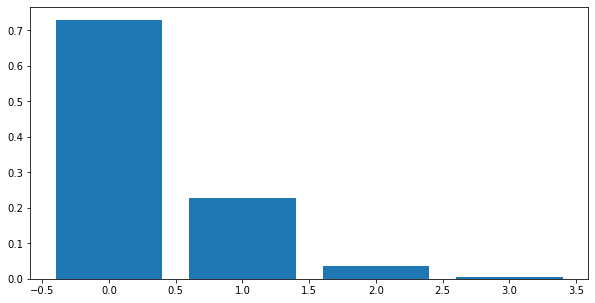

In [5]:
pca = PCA()
df[[0,1,2,3]] = pca.fit_transform(df[[0,1,2,3]])
plt.bar(range(4),pca.explained_variance_ratio_)

# using the first two components 

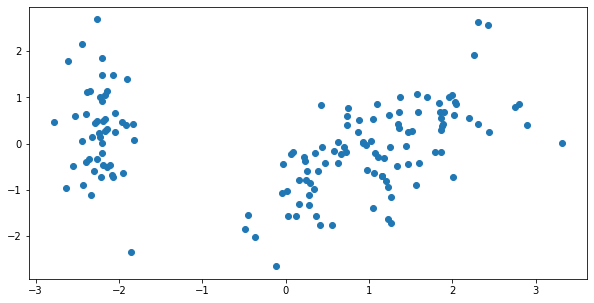

In [6]:
df.drop(columns= [2,3],inplace=True)
plt.scatter(df[0],df[1])

# splitting the data

In [7]:
x= df[[0,1]]
y= df[4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

# classifying with the linear features

In [8]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('confusion matrix : \n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test,y_pred))

confusion matrix : 
 [[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]
Accuracy :  0.9473684210526315


# visualizing the linear classifier

In [9]:
def visualize(x_test,y_test,classifier):
    from matplotlib.colors import ListedColormap

    x1, x2 = np.meshgrid(np.arange(start = -4,stop =4, step = 0.01),
                        np.arange(start = -3, stop = 5, step = 0.01))
    plt.contourf(x1, x2, classifier.predict((np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
                alpha= 0.75, cmap = ListedColormap(('red','green','blue')))

    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    plt.scatter(x_test[0],x_test[1],c=y_test)

    plt.title('classifier')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.legend()
    plt.show()

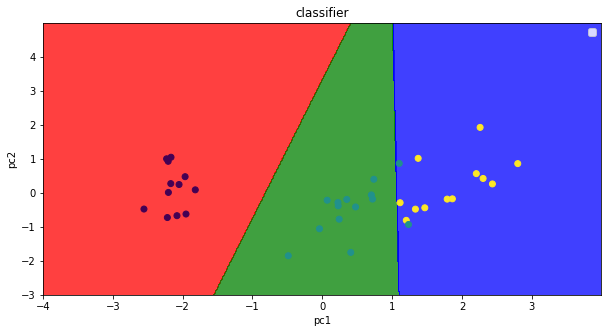

In [10]:
visualize(x_test,y_test,classifier)

# generating polynomia features 

In [11]:
poly = PolynomialFeatures(degree=3, interaction_only= False, include_bias= False)
x_poly = poly.fit_transform(x_train)

In [12]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

# classifying with polynomial features 

In [13]:
lrc = LogisticRegression()
lrc.fit(x_poly,y_train)
y_pred2 = lrc.predict(poly.transform(x_test))
print('confusion matrix : \n', metrics.confusion_matrix(y_test, y_pred2))
print('Accuracy : ', metrics.accuracy_score(y_test,y_pred2))

confusion matrix : 
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 12]]
Accuracy :  0.9736842105263158


# visualizing the polynomial classifier Boundaries

In [14]:
def visualize_poly(x_test,y_test,classifier,poly):
    from matplotlib.colors import ListedColormap
    x1, x2 = np.meshgrid(np.arange(start = -4,stop =4, step = 0.01),
                        np.arange(start = -3, stop = 5, step = 0.01))
    plt.contourf(x1, x2, classifier.predict(poly.fit_transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
                alpha= 0.75, cmap = ListedColormap(('red','green','blue')))

    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    plt.scatter(x_test[0],x_test[1],c=y_test)

    plt.title('classifier')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.legend()
    plt.show()

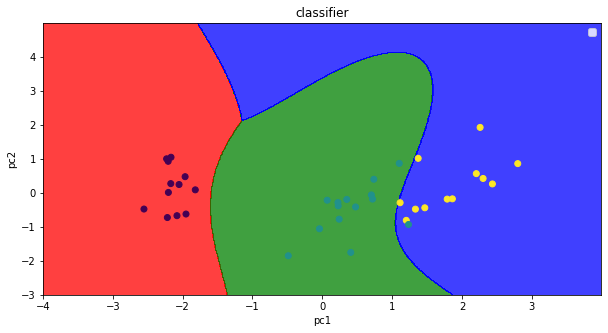

In [15]:
visualize_poly(x_test,y_test,lrc,poly)